In [35]:
# Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
 

In [36]:
# Loading Data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [39]:
print("\nFirst Review (as integers):")
print(x_train[0])
print("\nFirst Review Label:", y_train[0])


First Review (as integers):
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

First Review Label: 1


In [42]:
# Data Preparation
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)



In [44]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=maxlen))  # Embedding layer
model.add(GlobalAveragePooling1D())                                        # Pooling layer
model.add(Dense(64, activation='relu'))                                     # Hidden layer 1
model.add(Dense(32, activation='relu'))                                     # Hidden layer 2
model.add(Dense(1, activation='sigmoid'))                                   # Output layer

In [45]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
# Train model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6663 - loss: 0.5797 - val_accuracy: 0.8352 - val_loss: 0.3652
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8964 - loss: 0.2516 - val_accuracy: 0.8396 - val_loss: 0.3642
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9249 - loss: 0.1943 - val_accuracy: 0.8838 - val_loss: 0.2953
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9413 - loss: 0.1575 - val_accuracy: 0.8574 - val_loss: 0.3548
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9444 - loss: 0.1437 - val_accuracy: 0.8562 - val_loss: 0.4059
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9588 - loss: 0.1168 - val_accuracy: 0.8666 - val_loss: 0.4024
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9688 - loss: 0.1015 - val_accuracy: 0.8410 - val_loss: 0.5265
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9716 - loss: 0.0845 - val_accuracy: 0.

In [47]:
# Predict
y_pred = (model.predict(x_test) > 0.5).astype("int32").flatten()

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [48]:
result = pd.DataFrame()
result['Actual'], result['Predicted'] = y_test, y_pred
result.sample(5)

,Actual,Predicted
1782,1,1
14801,0,0
11648,0,0
19280,0,0
15090,1,1


In [49]:
# Evaluate
acc = accuracy_score(y_test, y_pred)
print("\nTest Accuracy: ", acc)


Test Accuracy:  0.8492


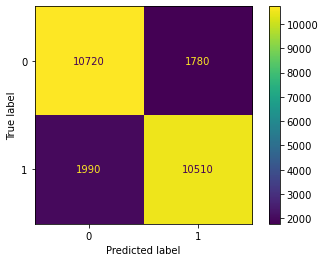

In [50]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     12500
           1       0.86      0.84      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

